In [ ]:
"""
data/
├── Test/
│   ├── Ascaris_lumbericoides/
│   │   ├── Ascaris lumbericoides_0001.jpg
|   |   |── Ascaris lumbericoides_0002.jpg
│   │   ├── ....
│   ├── Capillaria_philippinensis
│   │   ├── Capillaria philippinensis_0001.jpg
|   |   ├── Capillaria philippinensis_0002.jpg
|   |   ├── ...
│   └── ...
├── Train/
│   ├── Ascaris_lumbericoides/
│   │   ├── Ascaris lumbericoides_0001.jpg
|   |   |── Ascaris lumbericoides_0002.jpg
│   │   ├── ....
│   ├── Capillaria_philippinensis
│   │   ├── Capillaria philippinensis_0001.jpg
|   |   ├── Capillaria philippinensis_0002.jpg
|   |   ├── ...
│   └── ...
└── Validate/
    ├── Ascaris_lumbericoides/
    │   ├── Ascaris lumbericoides_0001.jpg
    |   |── Ascaris lumbericoides_0002.jpg
    │   ├── ....
    ├── Capillaria_philippinensis
    │   ├── Capillaria philippinensis_0001.jpg
    |   ├── Capillaria philippinensis_0002.jpg
    |   ├── ...
    └── ...
    └── ...
"""

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Dataset Preparation  
- load the dataset
- resize to (244 x 244) pixels
- convert to grayscale
- return the number of images present in the testing, training and validation set and how many categories in each of them (shape of the dataset)

In [2]:
dataset = {
        'train': {'images': [], 'labels': []},
        'test': {'images': [], 'labels': []},
        'validate': {'images': [], 'labels': []},
    }

def load_dataset(data_dir, image_size=(224, 224)):
    
    """
    Load images and labels from a dataset directory with 'Train', 'Test', and 'Validate' subfolders
    
    Parameters:
    - data_dir: Path to the main dataset directory
    - image_size: Tuple indicating the desired size to resize images (default is (224, 224))
    
    Returns:
    - A dictionary containing the loaded images and labels for 'train', 'test', and 'validate' sets, along with the shapes of the images and label counts
    
    """

    for folder in ['Train', 'Test', 'Validate']: # loop through the Train, Test and Validate folder
        set_path = os.path.join(data_dir, folder)
        
        for category in os.listdir(set_path): # loop through each subfolders in the Train, Test, and Validate folder
            category_path = os.path.join(set_path, category)
            
            if os.path.isdir(category_path): # ensure the current path is a directory
                # Loop through each image file in the category
                for img_file in os.listdir(category_path):
                    img_path = os.path.join(category_path, img_file)
                    img = cv2.imread(img_path) # read each image using openCV
                    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) # convert to gray scale
                    
                    """python returns a ValueError as the images are of different 
                    dimmensions which causes np.array() to to fail when trying to convert a list of images into a Numpy array()"""
                    img = cv2.resize(img, image_size) 
                    dataset[folder.lower()]['images'].append(img) # append the names of the subfolder as labels for each image
                    dataset[folder.lower()]['labels'].append(category)  # Use folder name as label

    # convert lists to np.arrays()
    dataset['train']['images'] = np.array(dataset['train']['images'])
    dataset['test']['images'] = np.array(dataset['test']['images'])
    dataset['validate']['images'] = np.array(dataset['validate']['images'])

    return (
        dataset['train']['images'].shape, 
        dataset['test']['images'].shape, 
        dataset['validate']['images'].shape
    )

data_dir = '/Users/rakshithbn/Desktop/MLD-Advanced/data'
dataset_info = load_dataset(data_dir)
dataset_info

((220, 224, 224), (110, 224, 224), (110, 224, 224))

## Define base function to plot the the gallery of the eggs
- returns plot (Gray color indicates negative values, white indicates positive values)

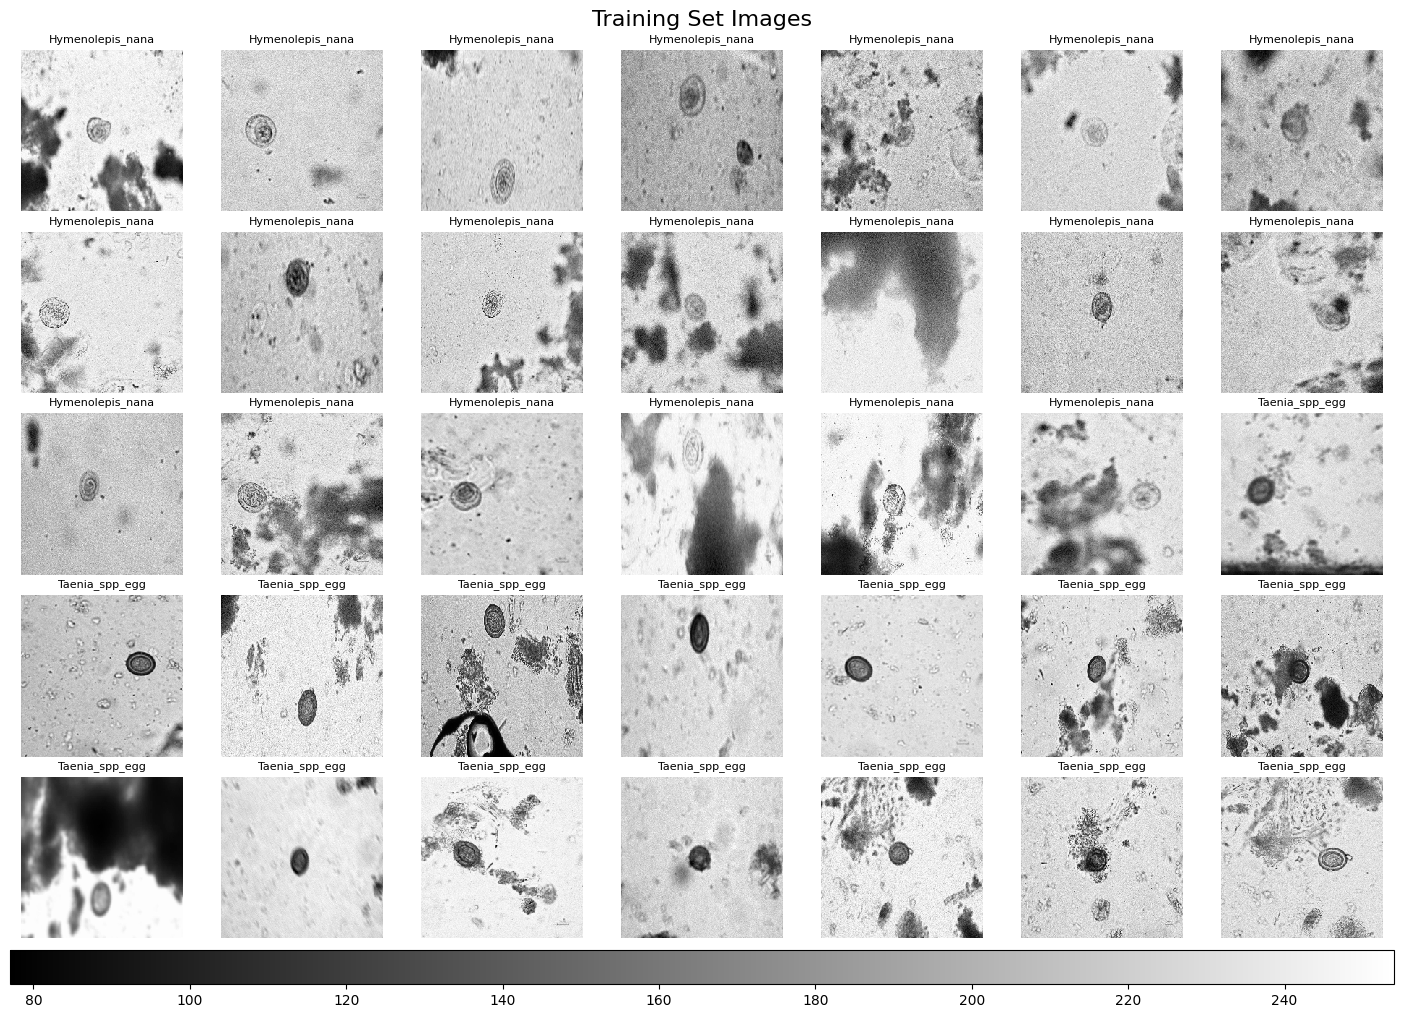

In [3]:
n_row, n_col = 5, 7
n_components = n_row * n_col
image_shape = (64, 64)  # reshape to plot

def plot_gallery(title, images, labels, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    fig, axs = plt.subplots(
        nrows=n_row,
        ncols=n_col,
        figsize=(2.0 * n_col, 2 * n_row),
        facecolor="white",
        constrained_layout=True
    )
    fig.set_constrained_layout_pads(w_pad=0.01, h_pad=0.02, hspace=0, wspace=0)
    fig.suptitle(title, size=16)
    
    axs = np.ravel(axs) # Flatten the array of axes for easy iteration
    
    for ax, img, label in zip(axs, images, labels):
        im = ax.imshow(img, cmap=cmap, interpolation="nearest")
        ax.set_title(label, fontsize=8)
        ax.axis("off")
        
    for ax in axs[len(images):]: #  hide any remaining axes if fewer images than grid slots
        ax.axis("off")

    fig.colorbar(im, ax=axs, orientation="horizontal", shrink=0.99, aspect=40, pad=0.01) # colorbar for reference
    plt.show()

images_to_display = dataset['train']['images'][:min(len(dataset['train']['images']), n_components)]
labels_to_display = dataset['train']['labels'][:min(len(dataset['train']['labels']), n_components)]

plot_gallery("Training Set Images", images_to_display, labels_to_display, n_col=n_col, n_row=n_row)